**For Figure 8 of the paper**

We want to plot the PDFs (or CDFs) of the inputs to the NNs once for Narval data and once for Qubicc data to see whether they align or not. I.e. whether the Narval-trained NN would have to generalize by a lot. 

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import time
# Add path with my_classes to sys.path
sys.path.insert(0, '/home/b/b309170/workspace_icon-ml/iconml_clc/')
sys.path.insert(0, '/home/b/b309170/workspace_icon-ml/iconml_clc/grid_cell_based_v2/source_code')

from my_classes import load_data
# from for_preprocessing import Gamma_m
# from LCL import lcl

In [2]:
# Will otherwise crash inside a batch job
import matplotlib
matplotlib.use('PDF')

In [4]:
bw_adjust = 0.5
# bw_adjust = 0.25

## Plot joint distribution for temperature and pressure

In [2]:
# Loads the NARVAL data into the data_dict dictionary
# order_of_vars=['zg', 'fr_lake', 'fr_land', 'qv', 'qc', 'qi', 'temp', 'pres', 'rho', 'clc']
order_of_vars=['temp', 'pres']
data_dict_narval = load_data(source='narval', days='all', vert_interp=True, order_of_vars=order_of_vars)

temp
pres


In [3]:
# Loads the QUBICC data into the data_dict dictionary
# order_of_vars=['zg', 'fr_lake', 'fr_seaice', 'fr_land', 'hus', 'qclw_phy', 'cli', 'ta', 'pfull', 'rho', 'cl']
order_of_vars=['ta', 'pfull']
data_dict_qubicc = load_data(source='qubicc', days='all', vert_interp=True, order_of_vars=order_of_vars)

ta
pfull


/home/b/b309170/my_work/Miniconda3/envs/clouds/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/b/b309170/my_work/Miniconda3/envs/clouds/lib/python3.7/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/b/b309170/my_work/Miniconda3/envs/clouds/lib/python3.7/site-packages/seaborn/distributions.py:1213: UserWarning: The following kwargs were not used by contour: 'ec', 'fc'
  **contour_kws,


29.42471957206726


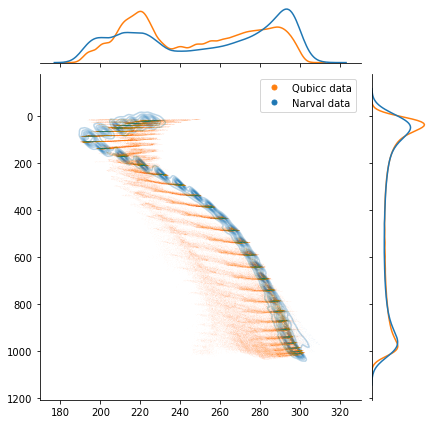

In [6]:
# Should take about 54 seconds

tips = pd.DataFrame(columns=['Temperature [K]', 'Pressure [hPa]']) # For the variable names
# h = sns.JointGrid(x="Temperature [K]", y="Pressure [hPa]", data=data_dict_qubicc)
h = sns.JointGrid(x=tips["Temperature [K]"], y=tips["Pressure [hPa]"])

m = 721 # Maximum: 721
n = 1635 # Maximum: 1635

t0 = time.time()
sns.kdeplot(data_dict_qubicc['ta'][:m].reshape(-1), ax=h.ax_marg_x, legend=False, color='tab:orange')
sns.kdeplot(data_dict_qubicc['pfull'][:m].reshape(-1)/100, ax=h.ax_marg_y, vertical=True, legend=False, color='tab:orange')
h.ax_joint.plot(data_dict_qubicc['ta'][:m].reshape(-1), data_dict_qubicc['pfull'][:m].reshape(-1)/100, ".", ms=0.01, 
            color='tab:orange')

sns.kdeplot(data_dict_narval['temp'][:n].reshape(-1), ax=h.ax_marg_x, legend=False, color='tab:blue')
sns.kdeplot(data_dict_narval['pres'][:n].reshape(-1)/100, ax=h.ax_marg_y, vertical=True, legend=False, color='tab:blue')

h.ax_joint.plot(data_dict_narval['temp'][:n].reshape(-1), data_dict_narval['pres'][:n].reshape(-1)/100, "b.", ms=0.01,
               color='tab:blue')
sns.kdeplot(x=data_dict_narval['temp'][:n].reshape(-1), y=data_dict_narval['pres'][:n].reshape(-1)/100, ec="b", legend=False, \
            fc="none", alpha=0.3, ax=h.ax_joint, bw_adjust=bw_adjust)

h.ax_joint.legend(['Qubicc data', 'Narval data'], loc='upper right', markerscale=1000)

plt.gca().invert_yaxis()
plt.savefig('/home/b/b309170/workspace_icon-ml/iconml_clc/additional_content/density_functions/Joint_PDF_QUBICC_NARVAL_temperature_pressure_%.2f.png'%bw_adjust, bbox_inches="tight")

print(time.time() - t0)